# Project Capstone: Fraud Detection on Auto Insurance Claims
**Notebook 2: Preprocessing**

## TABLE OF CONTENTS

**1. Problem Statement, SQL ETL and Understanding Data** <br>
**2. Preprocessing (This Notebook)** <br>
- [(1) Convert policy_bind_date and incident_date Data Type to Datetime](#1.-Convert-Date-Columns-from-Data-Type-Object-to-Datetime) <br>
- [(2) Split Column policy_csl into 2 New Columns and Convert Data Type from Object to Integer](#2.-Split-Column-policy_csl-into-2-New-Columns-and-Convert-Data-Type-from-Object-to-Integer) <br>
- [(3) Remove Column policy_csl](#3.-Remove-Column-policy_csl) <br>
- [(4) Remove Column _c39](#4.-Remove-Column-_c39) <br>
- [(5) Amend Typo in Column umbrella_limit](#5.-Amend-Typo-in-Column-umbrella_limit) <br>
- [(6) Create New Numerical Data and Remove Correlated Numerical Data to Fix Multicollinearity](#6.-Create-New-Numerical-Data-and-Remove-Correlated-Numerical-Data-to-Fix-Multicollinearity) <br>
- [(7) Feature Engineering](#7.-Feature-Engineering) <br>
- [(8) Export Datasets for Modelling](#8.-Export-Datasets-for-Modelling) <br>

**3. Feature Engineering, Modelling, Feature Selection, Hyperparameter Tuning and Final Model** <br>
**4. Fraud Claim Analysis, Conclusion & Recommendations** <br>

# Data Preprocessing

### Import Libraries

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Increase display range for easier viewing and EDA.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
### Import Data

In [3]:
# Read data from csv file.
auto_insurance_dataframe = pd.read_csv("./datasets/auto_insurance_sql.csv")

### Visualize Data

In [4]:
# Print number of rows and columns in dataframe.
print(f"Shape:", auto_insurance_dataframe.shape)

Shape: (1000, 41)


In [5]:
# Display first 3 rows of auto insurance dataframe.
auto_insurance_dataframe.head(3)

,incident_record_id,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,months_as_customer,age,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,1,521585,2014-10-17,OH,250/500,1000,1406.91,0,328,48,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,2,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,228,42,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,3,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,134,29,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


## 1. Convert Date Columns from Data Type Object to Datetime

There are 2 date columns: `policy_bind_date` and `incident_date`, whose data type is object. Their data type will be converted to datetime.

**Transform Existing Numerical Columns**

In [6]:
# Convert policy_bind_date from object to datetime.
auto_insurance_dataframe['policy_bind_date'] = pd.to_datetime(auto_insurance_dataframe['policy_bind_date'])

# Convert policy_incident_date from object to datetime.
auto_insurance_dataframe['incident_date'] = pd.to_datetime(auto_insurance_dataframe['incident_date'])

# Check to ensure both columns 'policy_bind_date' and 'incident_date' data type is converted to datetime.
print("Column policy_bind_date data type:", auto_insurance_dataframe['policy_bind_date'].dtypes)
print("Column incident_date data type:", auto_insurance_dataframe['incident_date'].dtypes)

Column policy_bind_date data type: datetime64[ns]
Column incident_date data type: datetime64[ns]


## 2. Split Column policy_csl into 2 New Columns and Convert Data Type from Object to Integer

Column `policy_csl` data type is object because it contains "/". As this column contain coverage available to compensate for injuries for any person up to certain dollar amount or a maximum of dollar amount per occurrence ([source](https://www.newlinlaw.com/tractor-trailer-accident-faqs/combined-single-limit-csl-policy)), this column will be split into 2 new columns and with data type converted from object to integer.

**Create New Numerical Columns**

In [7]:
# Create new column "policy_max_claim_per_person" from "policy_csl" column.
auto_insurance_dataframe["policy_max_claim_per_person"] = auto_insurance_dataframe["policy_csl"].str[0:3]

# Create new column "policy_max_claim_per_occurence" from "policy_csl" column.
auto_insurance_dataframe["policy_max_claim_per_occurence"] = auto_insurance_dataframe["policy_csl"].str[4:8]

**Convert New Numerical Columns Data Type**

In [8]:
# Convert new column "policy_max_claim_per_person" from data type object to integer.
auto_insurance_dataframe['policy_max_claim_per_person'] = auto_insurance_dataframe['policy_max_claim_per_person'].astype(int)

# Convert new column "policy_max_claim_per_occurence" from data type object to integer.
auto_insurance_dataframe['policy_max_claim_per_occurence'] = auto_insurance_dataframe['policy_max_claim_per_occurence'].astype(int)

# Check to ensure both columns 'policy_bind_date' and 'incident_date' data type is converted to datetime.
print("Column policy_max_claim_per_person data type:", auto_insurance_dataframe['policy_max_claim_per_person'].dtypes)
print("Column policy_max_claim_per_occurence data type:", auto_insurance_dataframe['policy_max_claim_per_occurence'].dtypes)

Column policy_max_claim_per_person data type: int32
Column policy_max_claim_per_occurence data type: int32


## 3. Remove Column policy_csl

This column `policy_csl` will be removed as the column has been split into 2 new columns above.

In [9]:
# Remove column "policy_csl".
auto_insurance_dataframe = auto_insurance_dataframe.drop(["policy_csl"], axis = 1)

# Check to ensure column "policy_csl" has been removed.
if "policy_csl" not in auto_insurance_dataframe.columns:
    print ("Column policy_csl has been removed.")

Column policy_csl has been removed.


## 4. Remove Column _c39

This column `_c39` is redundant and will be removed as it does not contain any information.

In [10]:
# Remove column "_c39".
auto_insurance_dataframe = auto_insurance_dataframe.drop(["_c39"], axis = 1)

# Check to ensure column "_c39" has been removed.
if "_c39" not in auto_insurance_dataframe.columns:
    print ("Column _c39 has been removed.")

Column _c39 has been removed.


## 5. Amend Typo in Column umbrella_limit

Umbrella insurance provides protection beyond existing limits and coverages of other policies ([source](https://www.geico.com/information/aboutinsurance/umbrella/#:~:text=Umbrella%20insurance%20is%20extra%20insurance,lawsuits%2C%20and%20personal%20liability%20situations.)). Hence, it could be a typo to have negative value in umbrella limit as there is either insurance coverage with positive value or no insurance with zero value.

In [11]:
# Filter record with negative value in coolumn umbrella_limit.
auto_insurance_dataframe[auto_insurance_dataframe["umbrella_limit"] < 0]

,incident_record_id,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,months_as_customer,age,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_max_claim_per_person,policy_max_claim_per_occurence
290,291,526039,1995-05-04,OH,500,1338.54,-1000000,284,42,438178,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,2015-01-29,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,3936 Tree Drive,13,1,YES,0,1,?,94160,8560,17120,68480,Chevrolet,Malibu,1996,N,100,300


In [12]:
# Update umbrella limit.
auto_insurance_dataframe.loc[290, ['umbrella_limit']] = 1000000

# Check to ensure the record with negative value in column umbrella_limit has been amended accordingly.
corrected_umbrella_limit = auto_insurance_dataframe.loc[290]
corrected_umbrella_limit = pd.DataFrame(corrected_umbrella_limit)
corrected_umbrella_limit.T

,incident_record_id,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,months_as_customer,age,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_max_claim_per_person,policy_max_claim_per_occurence
290,291,526039,1995-05-04,OH,500,1338.54,1000000,284,42,438178,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,2015-01-29,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,3936 Tree Drive,13,1,YES,0,1,?,94160,8560,17120,68480,Chevrolet,Malibu,1996,N,100,300


## 6. Create New Numerical Data and Remove Correlated Numerical Data to Fix Multicollinearity

To streamline the dataset further, numerical columns are investigated for multicollinearity.
First, a correlation heatmap is used to identify the correlation or bivariate relationship between two independent numerical columns. Then,  Variation Inflation Factor (VIF) is used for better understanding the correlation of one independent numerical column with a group of other numerical columns ([source](https://towardsdatascience.com/how-to-detect-and-deal-with-multicollinearity-9e02b18695f1)). 

In [13]:
# Function to draw correlation heatmap.
def correlation_heatmap(dataframe):
    
    # Establish size of figure.
    plt.figure(figsize=(23,23))

    # Find correlation of each column in dataframe.
    corr = dataframe.corr()

    # Set up mask to be "True" in the upper triangle.
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Create correlation heatmap, and masking the upper triangle for dataframe Test.
    sns.heatmap(corr, mask = mask, annot=True, cmap='Blues', vmin=-1, vmax=1)
    plt.title('Correlation between Numerical Features', fontsize=23);

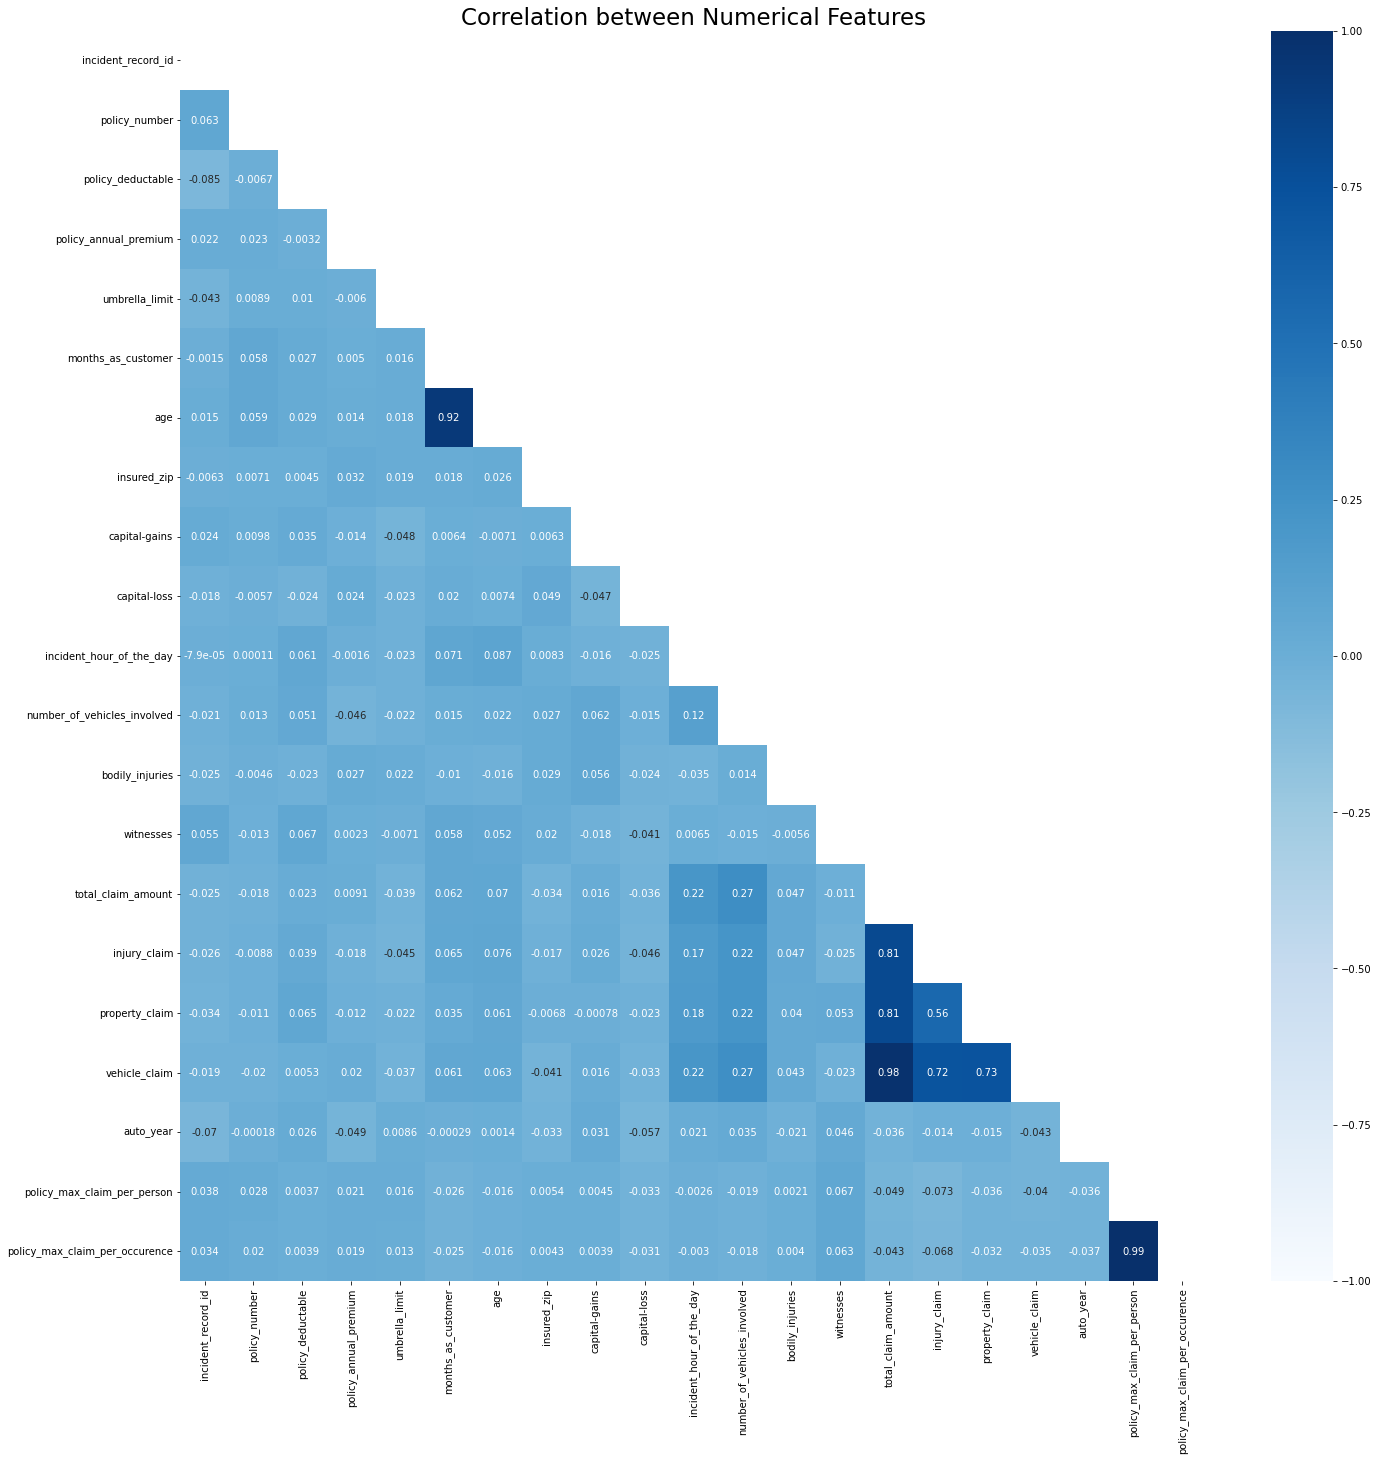

In [14]:
# Draw correlation heatmap.
correlation_heatmap(dataframe = auto_insurance_dataframe)

**Observations**:
- Based on Pearson's correlation coefficient ([source](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient)), there are numerous correlated clusters with strong positive correlation, whose coefficient is more than 0.5: 
    - `age` and `months_as_customer`
    - `policy_max_claim_per_occurence` and `policy_max_claim_per_person`
    - `total_claim_amount` and `injury_claim`
    - `total_claim_amount` and `property_claim`
    - `total_claim_amount` and `vehicle_claim`
    - `injury_claim` and `property_claim`
    - `injury_claim` and `vehicle_claim`
    - `property_claim` and `vehicle_claim`

In [15]:
# Create a function to calculate vif for all numerical columns.
def compute_vif(dataframe, considered_features):
    
    X = dataframe[considered_features].copy()
    
    # Calculation of variance inflation requires a constant.
    X['intercept'] = 1
    
    # Create dataframe to store vif values.
    vif = pd.DataFrame()
    vif["numerical_columns"] = X.columns
    vif["variation_inflation_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['numerical_columns']!='intercept']
    
    return vif

In [16]:
# Create a list to store columns whose data type is not object.
selected_numerical_columns = list(auto_insurance_dataframe.select_dtypes(exclude=['object', 'datetime']).columns)

In [17]:
print("********************************************************")
print(" Before Removing Columns that Caused Multicollinearity  ")
print("********************************************************")

# Calculate vif.
compute_vif(dataframe = auto_insurance_dataframe , considered_features = selected_numerical_columns).sort_values('variation_inflation_factor', ascending=False)

********************************************************
 Before Removing Columns that Caused Multicollinearity  
********************************************************


C:\Users\Gerald\.conda\envs\dsi-sg\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,numerical_columns,variation_inflation_factor
17,vehicle_claim,inf
16,property_claim,inf
15,injury_claim,inf
14,total_claim_amount,inf
19,policy_max_claim_per_person,95.192062
20,policy_max_claim_per_occurence,94.998044
6,age,6.810568
5,months_as_customer,6.797679
11,number_of_vehicles_involved,1.099343
10,incident_hour_of_the_day,1.068565


**Observations**: 
- These numerical columns have very strong VIF (as VIF range from 7 to infinity) that represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable ([source](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis)):
    - `total_claim_amount`, `vehicle_claim`, `injury_claim` and `property_claim` have infinity VIF respectively. 
    - `policy_max_claim_per_person` and `policy_max_claim_per_occurence` have VIF at about 95 (rounded to nearest number) respectively.
    - `age` and `months_as_customer` have VIF at about 7 (rounded to nearest number) respectively.

**Inspecting both correlation heatmap and VIF, to fix multicollinearity, the following changes will be made**:
- these numerical columns will be removed:
    - `vehicle_claim`, `injury_claim` and `property_claim`
    - `policy_max_claim_per_person`
- these numerical columns will be kept as they capture all information from other highly correlated numericals columns:
    - `total_claim_amount`
    - `policy_max_claim_per_occurence`
- these 2 columns `age` and `months_as_customer` will be combined to a new column that captures more information from both columns. Then, these 2 columns will be removed.

**Remove Numerical Columns  with Critical Levels of Multicollinearity**

In [18]:
# Remove columns "vehicle_claim", "injury_claim", "property_claim", "policy_max_claim_per_person".
auto_insurance_dataframe = auto_insurance_dataframe.drop(["vehicle_claim", "injury_claim", "property_claim", "policy_max_claim_per_person"], axis = 1)

**Create New Numerical Column and Remove Numerical Columns with Critical Levels of Multicollinearity**

In [19]:
# Combine `age` and `months_as_customer` in new column "age_when_become_customer".
auto_insurance_dataframe["age_when_become_customer"] = auto_insurance_dataframe["age"] - auto_insurance_dataframe["months_as_customer"]/12

# Remove columns `age` and `months_as_customer`.
auto_insurance_dataframe = auto_insurance_dataframe.drop(["age", "months_as_customer"], axis = 1)

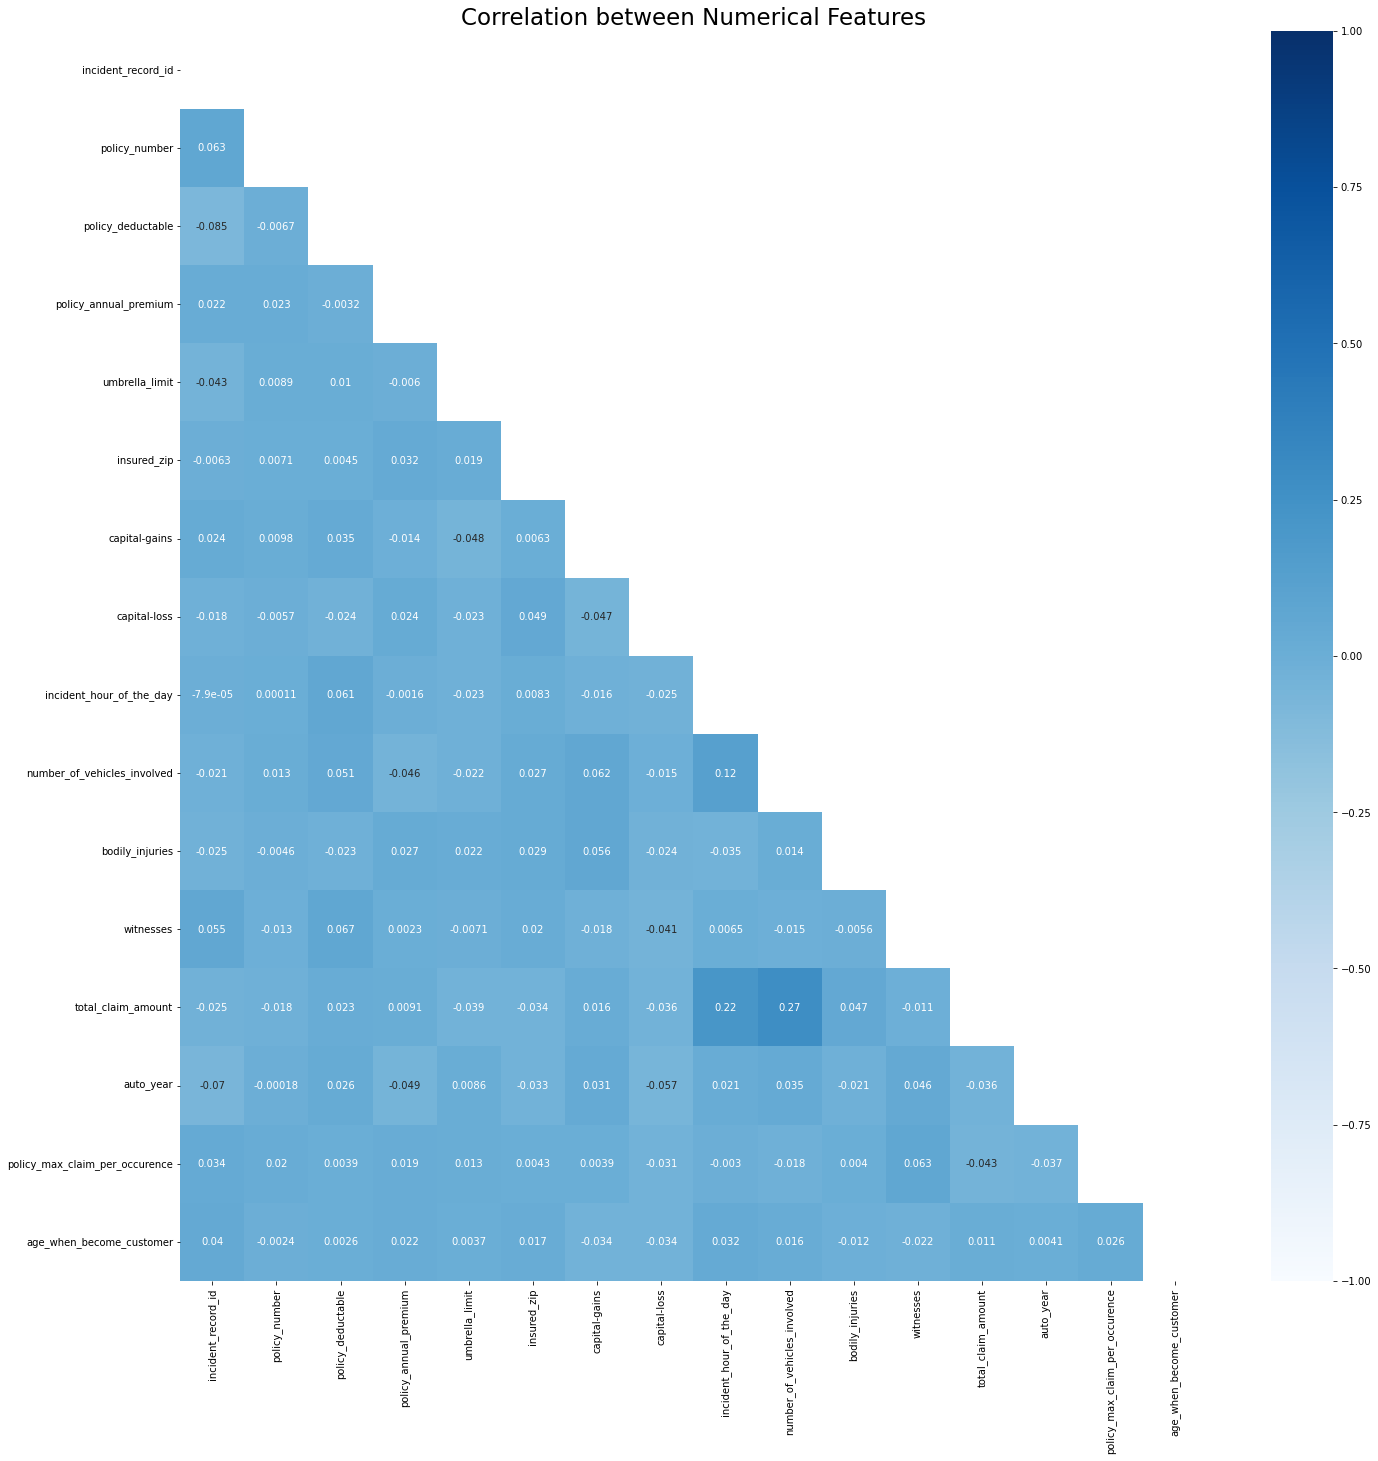

In [20]:
# Draw correlation heatmap after removing columns that cause multicollinearity.
correlation_heatmap(dataframe = auto_insurance_dataframe)

In [21]:
# Create a list to store columns whose data type is not object.
selected_numerical_columns = list(auto_insurance_dataframe.select_dtypes(exclude=['object', 'datetime']).columns)

print("********************************************************")
print(" After Removing Columns that Caused Multicollinearity  ")
print("********************************************************")

# Calculate vif after removing columns that cause multicollinearity.
compute_vif(dataframe = auto_insurance_dataframe , considered_features = selected_numerical_columns).sort_values('variation_inflation_factor', ascending=False)

********************************************************
 After Removing Columns that Caused Multicollinearity  
********************************************************


,numerical_columns,variation_inflation_factor
12,total_claim_amount,1.137911
9,number_of_vehicles_involved,1.099132
8,incident_hour_of_the_day,1.062606
0,incident_record_id,1.027950
13,auto_year,1.021373
2,policy_deductable,1.020995
11,witnesses,1.018668
6,capital-gains,1.017072
7,capital-loss,1.015735
10,bodily_injuries,1.012027


**Observation**:
- After removing numerical columns that caused multicollinearity: 
    - there is no correlated clusters with strong positive correlation
    - VIF in both numerical columns `total_claim_amount` and `policy_max_claim_per_occurence` have decreased signigicantly to 1.1 (reounded to nearest 1 decimal place) and 1.0 (reounded to nearest 1 decimal place) respectively. This means that there is moderate correlation between the specific column and other columns in the model, which is not severe enough to require attention ([source](https://www.statology.org/multicollinearity-stata)).

## 7. Feature Engineering

### Transform Existing Numerical Columns

These 2 date columns: `policy_bind_date` and `incident_date`, whose data type was object, have been converted to datetime.

In [22]:
# Check to ensure both columns 'policy_bind_date' and 'incident_date' data type is converted to datetime.
print("Column policy_bind_date data type:", auto_insurance_dataframe['policy_bind_date'].dtypes)
print("Column incident_date data type:", auto_insurance_dataframe['incident_date'].dtypes)

Column policy_bind_date data type: datetime64[ns]
Column incident_date data type: datetime64[ns]


### Create New Features

New features will be created in addition to new features `policy_max_claim_per_occurence` and `age_when_become_customer` that were created previously.

In [23]:
# Create new features "year", "month" and "day" from datetime column.
auto_insurance_dataframe['policy_bind_year'] = auto_insurance_dataframe['policy_bind_date'].dt.year
auto_insurance_dataframe['policy_bind_month'] = auto_insurance_dataframe['policy_bind_date'].dt.month
auto_insurance_dataframe['policy_bind_day'] = auto_insurance_dataframe['policy_bind_date'].dt.day

# Create new features "year", "month" and "day" from datetime column in Pandas
auto_insurance_dataframe['incident_year'] = auto_insurance_dataframe['incident_date'].dt.year
auto_insurance_dataframe['incident_month'] = auto_insurance_dataframe['incident_date'].dt.month
auto_insurance_dataframe['incident_day'] = auto_insurance_dataframe['incident_date'].dt.day

### Remove Features

Existing features, which are redundant, will be removed in addition to features `policy_csl` , `_c39`, `vehicle_claim`, `injury_claim`, `property_claim`, `policy_max_claim_per_person`, `age`, `months_as_customer`, that were removed previously.

In [24]:
# Remove redundant columns.
auto_insurance_dataframe = auto_insurance_dataframe.drop(['policy_bind_date', 'incident_date', 'incident_record_id'], axis=1)

### Transform Features

Features will be transformed for modelling.

**Map `fraud_reported` Indicators**

In [25]:
# Label fraud_reported, "Y" as 0 and "N" as 1 for modeling.
auto_insurance_dataframe['fraud_reported'] = auto_insurance_dataframe['fraud_reported'].map({'N': 0, 'Y': 1})

# Display first 3 rows of dataframe.
auto_insurance_dataframe.head(3)

,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,policy_max_claim_per_occurence,age_when_become_customer,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
0,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,Saab,92x,2004,1,500,20.666667,2014,10,17,2015,1,25
1,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,Mercedes,E400,2007,1,500,23.000000,2006,6,27,2015,1,21
2,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,Dodge,RAM,2007,0,300,17.833333,2000,9,6,2015,2,22


**Convert Categorical Features to Numeric Values**

Categorical features will be converted to numeric values for machine learning as many machine learning algorithms, such as logistic regression, strictly require numeric input data ([source](https://www.sharpsightlabs.com/blog/pandas-get-dummies)).

In [26]:
# First dummy feature is dropped as it is redundant as other new dummy variables encode the same information.
auto_insurance_dataframe_dummy = pd.get_dummies(auto_insurance_dataframe,
                                                columns = ['policy_state', 'insured_sex', 'insured_education_level', 
                                                           'insured_occupation', 'insured_hobbies', 'insured_relationship',
                                                           'incident_type', 'collision_type', 'incident_severity',
                                                           'authorities_contacted', 'incident_state', 'incident_city', 
                                                           'incident_location', 'property_damage', 'police_report_available',
                                                           'auto_make', 'auto_model'], drop_first = True) 

# Display first 3 rows of dataframe.
auto_insurance_dataframe_dummy.head(3)

,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,policy_max_claim_per_occurence,age_when_become_customer,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,incident_location_1028 Sky Lane,incident_location_1030 Pine Lane,incident_location_1087 Flute Drive,incident_location_1091 1st Drive,incident_location_1102 Apache Hwy,incident_location_1110 4th Drive,incident_location_1123 5th Lane,incident_location_1126 Texas Hwy,incident_location_1128 Maple Lane,incident_location_1133 Apache St,incident_location_1135 Solo Lane,incident_location_1173 Andromedia Ave,incident_location_1186 Rock St,incident_location_1213 4th Lane,incident_location_1215 Pine Hwy,incident_location_1218 Sky Hwy,incident_location_1220 MLK Ave,incident_location_1229 5th Ave,incident_location_1240 Tree Lane,incident_location_1248 MLK Ridge,incident_location_1267 Francis Hwy,incident_location_1269 Flute Drive,incident_location_1273 Rock Lane,incident_location_1275 4th Ridge,incident_location_1298 Maple Hwy,incident_location_1306 Andromedia St,incident_location_1316 Britain Ridge,incident_location_1320 Flute Lane,incident_location_1325 1st Lane,incident_location_1328 Texas Lane,incident_location_1331 Britain Hwy,incident_location_1331 Elm Ridge,incident_location_1346 5th Lane,incident_location_1353 Washington St,incident_location_1358 Maple St,incident_location_1364 Best St,incident_location_1365 Francis Ave,incident_location_1371 Texas Lane,incident_location_1376 Pine St,incident_location_1381 Francis Ave,incident_location_1386 Britain St,incident_location_1388 Embaracadero Hwy,incident_location_1416 Cherokee Ridge,incident_location_1422 Flute Ave,incident_location_1437 3rd Lane,incident_location_1454 5th Ridge,incident_location_1469 Lincoln Drive,incident_location_1472 4th Drive,incident_location_1491 Francis Ridge,incident_location_1507 S

## 8. Export Datasets for Modelling

In [27]:
# Export cleaned dataframe to csv.
auto_insurance_dataframe_dummy.to_csv('./datasets/auto_insurance_dataframe_cleaned.csv', index = False)

**Reasonable Check on Data Structure of Cleaned Dataframe**

In [28]:
# Read data from csv file.
auto_insurance_dataframe_cleaned = pd.read_csv("./datasets/auto_insurance_dataframe_cleaned.csv")

In [29]:
# Print number of rows and columns in dataframe.
print(f"Shape:", auto_insurance_dataframe_cleaned.shape)

Shape: (1000, 1147)


In [30]:
# Display first 3 rows of auto insurance dataframe.
auto_insurance_dataframe_cleaned.head(3)

,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,policy_max_claim_per_occurence,age_when_become_customer,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,incident_location_1028 Sky Lane,incident_location_1030 Pine Lane,incident_location_1087 Flute Drive,incident_location_1091 1st Drive,incident_location_1102 Apache Hwy,incident_location_1110 4th Drive,incident_location_1123 5th Lane,incident_location_1126 Texas Hwy,incident_location_1128 Maple Lane,incident_location_1133 Apache St,incident_location_1135 Solo Lane,incident_location_1173 Andromedia Ave,incident_location_1186 Rock St,incident_location_1213 4th Lane,incident_location_1215 Pine Hwy,incident_location_1218 Sky Hwy,incident_location_1220 MLK Ave,incident_location_1229 5th Ave,incident_location_1240 Tree Lane,incident_location_1248 MLK Ridge,incident_location_1267 Francis Hwy,incident_location_1269 Flute Drive,incident_location_1273 Rock Lane,incident_location_1275 4th Ridge,incident_location_1298 Maple Hwy,incident_location_1306 Andromedia St,incident_location_1316 Britain Ridge,incident_location_1320 Flute Lane,incident_location_1325 1st Lane,incident_location_1328 Texas Lane,incident_location_1331 Britain Hwy,incident_location_1331 Elm Ridge,incident_location_1346 5th Lane,incident_location_1353 Washington St,incident_location_1358 Maple St,incident_location_1364 Best St,incident_location_1365 Francis Ave,incident_location_1371 Texas Lane,incident_location_1376 Pine St,incident_location_1381 Francis Ave,incident_location_1386 Britain St,incident_location_1388 Embaracadero Hwy,incident_location_1416 Cherokee Ridge,incident_location_1422 Flute Ave,incident_location_1437 3rd Lane,incident_location_1454 5th Ridge,incident_location_1469 Lincoln Drive,incident_location_1472 4th Drive,incident_location_1491 Francis Ridge,incident_location_1507 S